In [3]:
# Initial Imports
import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from pathlib import Path
import hvplot.pandas
from MCForecastTools import MCSimulation


# Import S&P 500 stock ticker list
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_stocks = table[0]
df_stocks = df_stocks.drop(columns=["Security", "GICS Sub-Industry", "Headquarters Location", "Date added", "CIK", "Founded"])

df_stocks.head()

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [4]:
load_dotenv()

True

In [5]:
# Rename Column
df_stocks = df_stocks.rename(columns={
    "Symbol": "symbol"
})
df_stocks.head()

,symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [6]:
## Import historical price performance for S&P 500 stocks over the last 7 years


# timeframe = '1Day',
# start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2023-04-30', tz='America/New_York').isoformat()

# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# alpaca = tradeapi.REST(
#     alpaca_api_key,
#      alpaca_secret_key,
#      api_version="v2"
#  )

# tickers = df_stocks['symbol'][:500].tolist()


# df_sp500_hist = alpaca.get_bars(
#      tickers,
#      timeframe,
#      start = start_date,
#      end = end_date
#  ).df

In [7]:
# Placing Data into CSV file

#df_sp500_hist.to_csv('sp500_hist.csv', index=True)


In [8]:
#Read CSV File with SP500 history

df_sp500_hist = pd.read_csv('sp500_hist.csv')

df_sp500_hist

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol
0,2016-06-01 04:00:00+00:00,31.94,32.260,31.7300,31.95,6416243,42250,31.952436,AAL
1,2016-06-02 04:00:00+00:00,31.67,32.070,31.5799,31.67,6813295,40265,31.803351,AAL
2,2016-06-03 04:00:00+00:00,31.59,31.600,30.3700,30.81,12424133,67650,30.729925,AAL
3,2016-06-06 04:00:00+00:00,30.77,31.300,30.3800,31.26,8335439,53642,30.976306,AAL
4,2016-06-07 04:00:00+00:00,31.46,32.870,31.1000,32.36,12424206,72297,32.405641,AAL
...,...,...,...,...,...,...,...,...,...
854605,2023-04-24 04:00:00+00:00,288.34,290.335,286.3800,288.19,244305,8898,288.013010,ZBRA
854606,2023-04-25 04:00:00+00:00,290.34,293.480,283.9650,284.10,297760,10150,287.351108,ZBRA
854607,2023-04-26 04:00:00+00:00,284.90,286.280,279.5900,280.42,214911,9237,282.230909,ZBRA
854608,2023-04-27 04:00:00+00:00,283.51,285.040,278.2100,284.12,234309,8046,282.403446,ZBRA


In [9]:
# Date column Normalisation
df_sp500_hist = df_sp500_hist.reset_index()

df_sp500_hist = df_sp500_hist.rename(columns={
    "timestamp": "date"
})


In [10]:
# Delete Unnecessary Columns

df_sp500_hist = df_sp500_hist.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap", "index"])
df_sp500_hist

,date,close,symbol
0,2016-06-01 04:00:00+00:00,31.95,AAL
1,2016-06-02 04:00:00+00:00,31.67,AAL
2,2016-06-03 04:00:00+00:00,30.81,AAL
3,2016-06-06 04:00:00+00:00,31.26,AAL
4,2016-06-07 04:00:00+00:00,32.36,AAL
...,...,...,...
854605,2023-04-24 04:00:00+00:00,288.19,ZBRA
854606,2023-04-25 04:00:00+00:00,284.10,ZBRA
854607,2023-04-26 04:00:00+00:00,280.42,ZBRA
854608,2023-04-27 04:00:00+00:00,284.12,ZBRA


In [11]:
#Set 'Date' as Index

df_sp500_hist.set_index('date', inplace=True)


In [12]:
df_sp500_hist.head()

,close,symbol
date,,
2016-06-01 04:00:00+00:00,31.95,AAL
2016-06-02 04:00:00+00:00,31.67,AAL
2016-06-03 04:00:00+00:00,30.81,AAL
2016-06-06 04:00:00+00:00,31.26,AAL
2016-06-07 04:00:00+00:00,32.36,AAL


In [13]:
# Create Daily Return Column

df_sp500_hist['Daily Return'] = df_sp500_hist.groupby('symbol')['close'].pct_change()

In [14]:
display(df_sp500_hist.head())
display(df_sp500_hist.tail())

,close,symbol,Daily Return
date,,,
2016-06-01 04:00:00+00:00,31.95,AAL,NaN
2016-06-02 04:00:00+00:00,31.67,AAL,-0.008764
2016-06-03 04:00:00+00:00,30.81,AAL,-0.027155
2016-06-06 04:00:00+00:00,31.26,AAL,0.014606
2016-06-07 04:00:00+00:00,32.36,AAL,0.035189


,close,symbol,Daily Return
date,,,
2023-04-24 04:00:00+00:00,288.19,ZBRA,0.001007
2023-04-25 04:00:00+00:00,284.10,ZBRA,-0.014192
2023-04-26 04:00:00+00:00,280.42,ZBRA,-0.012953
2023-04-27 04:00:00+00:00,284.12,ZBRA,0.013194
2023-04-28 04:00:00+00:00,288.03,ZBRA,0.013762


In [15]:
# Drop nulls

df_sp500_hist = df_sp500_hist.dropna()
df_sp500_hist

df_sp500_hist.head()

df_stocks

,symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


In [16]:
# Annualized Sharpe Ratios

sharpe_ratios = (df_sp500_hist.groupby('symbol')['Daily Return'].mean() * 252) / (df_sp500_hist.groupby('symbol')['Daily Return'].std() * np.sqrt(252))
df_sharpe_ratios = pd.DataFrame(sharpe_ratios)
df_sharpe_ratios = df_sharpe_ratios.rename(columns= {'Daily Return': 'Sharpe Ratio'})
df_stocks = df_stocks.set_index(['symbol'])
display(df_sharpe_ratios.head())
display(df_stocks)

,Sharpe Ratio
symbol,
A,0.701903
AAL,0.050561
AAP,0.090475
AAPL,0.513076
ABBV,0.609853


,GICS Sector
symbol,
MMM,Industrials
AOS,Industrials
ABT,Health Care
ABBV,Health Care
ACN,Information Technology
...,...
YUM,Consumer Discretionary
ZBRA,Information Technology
ZBH,Health Care


In [17]:
# Concatenate both Dataframes
df_sharpe_ratios = pd.concat([df_sharpe_ratios, df_stocks], axis = "columns", join = "inner")
df_sharpe_ratios.head()


,Sharpe Ratio,GICS Sector
symbol,,
A,0.701903,Health Care
AAL,0.050561,Industrials
AAP,0.090475,Consumer Discretionary
AAPL,0.513076,Information Technology
ABBV,0.609853,Health Care


In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_plot = df_sharpe_ratios.hvplot.bar(title = 'Sharpe Ratios for each Stock')
sharpe_plot

:Bars   [index]   (Sharpe Ratio)

In [19]:
df_sharpe_ratios= df_sharpe_ratios.reset_index()

In [20]:
df_top_sharpe_ratios = pd.DataFrame(df_sharpe_ratios.groupby(['GICS Sector', 'symbol'])['Sharpe Ratio'].max().sort_values(ascending=False))
df_top_sharpe_ratios = df_top_sharpe_ratios.head(10)
df_top_sharpe_ratios

Sharpe Ratio
GICS Sector            symbol              
Health Care            GEHC        2.412991
Information Technology ENPH        1.178873
                       CDNS        1.107632
                       SNPS        1.088469
                       AMD         1.045843
Industrials            PWR         1.036131
Financials             AJG         1.034337
Industrials            CARR        1.019958
Health Care            LLY         1.014629
                       PODD        0.997169

In [21]:
max_sharpe_indices = df_sharpe_ratios.groupby('GICS Sector')['Sharpe Ratio'].idxmax()

In [22]:
df_sector = df_sharpe_ratios.loc[max_sharpe_indices]
df_sector

,symbol,Sharpe Ratio,GICS Sector
442,TMUS,0.780146,Communication Services
171,ETSY,0.873457,Consumer Discretionary
111,COST,0.871412,Consumer Staples
313,MPC,0.621992,Energy
20,AJG,1.034337,Financials
200,GEHC,2.412991,Health Care
385,PWR,1.036131,Industrials
161,ENPH,1.178873,Information Technology
124,CTVA,0.818468,Materials
406,SBAC,0.651161,Real Estate


In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_hist = pd.read_csv('sp500_hist.csv')
df_stock_hist = df_stock_hist.set_index(['timestamp'])
# Reorganize the DataFrame
# Separate ticker data
TMUS = df_stock_hist[df_stock_hist['symbol'] == 'TMUS'].drop('symbol', axis = 1) 
ETSY = df_stock_hist[df_stock_hist['symbol'] == 'ETSY'].drop('symbol', axis = 1)
COST = df_stock_hist[df_stock_hist['symbol'] == 'COST'].drop('symbol', axis = 1)
MPC = df_stock_hist[df_stock_hist['symbol'] == 'MPC'].drop('symbol', axis = 1)
AJG = df_stock_hist[df_stock_hist['symbol'] == 'AJG'].drop('symbol', axis = 1)
PWR = df_stock_hist[df_stock_hist['symbol'] == 'PWR'].drop('symbol', axis = 1)
ENPH = df_stock_hist[df_stock_hist['symbol'] == 'ENPH'].drop('symbol', axis = 1)
CTVA = df_stock_hist[df_stock_hist['symbol'] == 'CTVA'].drop('symbol', axis = 1)
CEG = df_stock_hist[df_stock_hist['symbol'] == 'CEG'].drop('symbol', axis = 1)
SBAC = df_stock_hist[df_stock_hist['symbol'] == 'SBAC'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
# df_stock_data = pd.concat([TMUS,ETSY, COST, MPC, AJG, GECH, PWR, ENPH, CTVA, CEG, SBAC]
#                           , axis = 1, keys = ('TMUS','ETSY', 'COST', 'MPC', 'AJG', 'GECH', 'PWR', 'ENPH', 'CTVA', 'CEG', 'SBAC'))


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([TMUS,ETSY,COST, CEG, MPC, AJG, PWR, ENPH, CTVA, SBAC]
                          , axis = 1, keys = ('TMUS','ETSY','COST','CEG', 'MPC', 'AJG', 'PWR', 'ENPH', 'CTVA','SBAC'))


display(df_stock_data.head())
display(df_stock_data.tail())

TMUS                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2016-06-01 04:00:00+00:00  42.50  42.880  42.420  42.62  4443732       24278   
2016-06-02 04:00:00+00:00  42.75  43.230  42.430  43.19  4664487       26003   
2016-06-03 04:00:00+00:00  43.18  43.825  42.930  43.63  3492011       23838   
2016-06-06 04:00:00+00:00  43.56  43.820  42.975  43.07  5356814       29238   
2016-06-07 04:00:00+00:00  43.25  43.975  43.170  43.74  2628548       19182   

                                      ETSY              ...   CTVA  \
                                vwap  open  high   low  ... volume   
timestamp                                               ...          
2016-06-01 04:00:00+00:00  42.627605  9.21  9.69  9.10  ...    NaN   
2016-06-02 04:00:00+00:00  43.039864  9.36  9.41  8.98  ...    NaN   
2016-06-03 04:00:00+00:00  43.394187  9.24  9.31  9.09  ...    NaN   
2016-06-06 04:00:00+00:00  43.292048  9.23  9.66  9.19  ...    NaN   
2016-06-07 04:00:00+00:00  43.767777  9.63  9.79  9.50  ...    NaN   

                                              SBAC                           \
                          trade_count vwap    open    high      low   close   
timestamp                                                                     
2016-06-01 04:00:00+00:00         NaN  NaN   99.81  100.47   98.250   98.36   
2016-06-02 04:00:00+00:00         NaN  NaN   97.94  101.83   97.940  101.75   
2016-06-03 04:00:00+00:00         NaN  NaN  101.68  102.12  100.170  102.00   
2016-06-06 04:00:00+00:00         NaN  NaN  102.47  102.62  101.950  102.15   
2016-06-07 04:00:00+00:00         NaN  NaN  102.72  104.64  102.515  104.42   

                                                            
                            volume trade_count        vwap  
timestamp                                                   
2016-06-01 04:00:00+00:00  1195254       13209   99.085638  
2016-06-02 04:00:00+00:00  1107879        9797  101.100791  
2016-06-03 04:00:00+00:00   900134        7168  101.791644  
2016-06-06 04:00:00+00:00   601692        6324  102.288878  
2016-06-07 04:00:00+00:00   861091        9319  104.070868  

[5 rows x 70 columns]

TMUS                                       \
                             open      high       low   close   volume   
timestamp                                                                
2023-04-24 04:00:00+00:00  146.13  146.7699  145.6200  145.86  3889329   
2023-04-25 04:00:00+00:00  146.27  149.1800  146.1950  148.00  6396358   
2023-04-26 04:00:00+00:00  146.19  148.9400  145.6625  148.28  4523095   
2023-04-27 04:00:00+00:00  148.85  150.4500  148.7600  149.94  6332780   
2023-04-28 04:00:00+00:00  146.50  147.0200  143.3450  143.90  9337770   

                                                      ETSY                   \
                          trade_count        vwap     open    high      low   
timestamp                                                                     
2023-04-24 04:00:00+00:00       42503  146.096546  102.630  103.25  101.565   
2023-04-25 04:00:00+00:00       57061  148.092733  101.730  102.32   98.110   
2023-04-26 04:00:00+00:00       53139  148.345059   99.350  100.64   97.350   
2023-04-27 04:00:00+00:00       75846  149.882032  100.215  101.38   99.240   
2023-04-28 04:00:00+00:00      116142  144.496454  100.690  101.20   98.710   

                           ...       CTVA                           SBAC  \
                           ...     volume trade_count       vwap    open   
timestamp                  ...                                             
2023-04-24 04:00:00+00:00  ...  1393682.0     20151.0  61.532541  256.59   
2023-04-25 04:00:00+00:00  ...  1718375.0     21727.0  60.710740  254.43   
2023-04-26 04:00:00+00:00  ...  1762743.0     22090.0  59.692513  250.41   
2023-04-27 04:00:00+00:00  ...  1790963.0     23034.0  60.390465  251.36   
2023-04-28 04:00:00+00:00  ...  2921923.0     21012.0  61.080557  255.63   

                                                                        \
                              high     low   close  volume trade_count   
timestamp                                                                
2023-04-24 04:00:00+00:00  259.000  253.65  255.62  404479       12730   
2023-04-25 04:00:00+00:00  255.860  251.08  251.62  586864       14754   
2023-04-26 04:00:00+00:00  252.545  248.95  250.20  613522       16953   
2023-04-27 04:00:00+00:00  257.080  251.10  256.85  501320       12791   
2023-04-28 04:00:00+00:00  261.600  255.01  260.89  716460       18948   

                                       
                                 vwap  
timestamp                              
2023-04-24 04:00:00+00:00  255.558056  
2023-04-25 04:00:00+00:00  252.297596  
2023-04-26 04:00:00+00:00  250.414298  
2023-04-27 04:00:00+00:00  255.700326  
2023-04-28 04:00:00+00:00  260.122909  

[5 rows x 70 columns]

In [24]:
# Run Monte Carlo Simulation with evenly distributed weights

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10],
    num_simulation = 200,
    num_trading_days = 252*30
)

MC_even_dist.portfolio_data.head()

TMUS                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2016-06-01 04:00:00+00:00  42.50  42.880  42.420  42.62  4443732       24278   
2016-06-02 04:00:00+00:00  42.75  43.230  42.430  43.19  4664487       26003   
2016-06-03 04:00:00+00:00  43.18  43.825  42.930  43.63  3492011       23838   
2016-06-06 04:00:00+00:00  43.56  43.820  42.975  43.07  5356814       29238   
2016-06-07 04:00:00+00:00  43.25  43.975  43.170  43.74  2628548       19182   

                                                   ETSY        ... CTVA  \
                                vwap daily_return  open  high  ... vwap   
timestamp                                                      ...        
2016-06-01 04:00:00+00:00  42.627605          NaN  9.21  9.69  ...  NaN   
2016-06-02 04:00:00+00:00  43.039864     0.013374  9.36  9.41  ...  NaN   
2016-06-03 04:00:00+00:00  43.394187     0.010188  9.24  9.31  ...  NaN   
2016-06-06 04:00:00+00:00  43.292048    -0.012835  9.23  9.66  ...  NaN   
2016-06-07 04:00:00+00:00  43.767777     0.015556  9.63  9.79  ...  NaN   

                                          SBAC                           \
                          daily_return    open    high      low   close   
timestamp                                                                 
2016-06-01 04:00:00+00:00          NaN   99.81  100.47   98.250   98.36   
2016-06-02 04:00:00+00:00          NaN   97.94  101.83   97.940  101.75   
2016-06-03 04:00:00+00:00          NaN  101.68  102.12  100.170  102.00   
2016-06-06 04:00:00+00:00          NaN  102.47  102.62  101.950  102.15   
2016-06-07 04:00:00+00:00          NaN  102.72  104.64  102.515  104.42   

                                                                         
                            volume trade_count        vwap daily_return  
timestamp                                                                
2016-06-01 04:00:00+00:00  1195254       13209   99.085638          NaN  
2016-06-02 04:00:00+00:00  1107879        9797  101.100791     0.034465  
2016-06-03 04:00:00+00:00   900134        7168  101.791644     0.002457  
2016-06-06 04:00:00+00:00   601692        6324  102.288878     0.001471  
2016-06-07 04:00:00+00:00   861091        9319  104.070868     0.022222  

[5 rows x 80 columns]

In [25]:
# Calculate commulative returns

import warnings
warnings.filterwarnings('ignore')

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003229,1.010404,1.000039,1.002104,0.994024,0.999076,1.008971,1.016211,0.990221,0.993411,...,1.007894,1.000055,0.995386,1.013480,0.998394,0.990321,0.998921,0.996071,0.986660,1.000547
2,1.008762,1.020893,1.013703,1.016213,1.002389,0.999610,1.006451,1.003551,0.997662,1.008664,...,1.014188,1.008563,0.994334,1.021354,1.008102,1.002341,1.029320,0.990383,0.998358,1.011129
3,1.008172,1.021922,1.011802,1.007436,1.000621,0.980635,0.997667,1.010887,1.004640,1.011716,...,1.036765,1.015128,1.011227,1.006888,1.019948,1.009802,1.037264,0.985044,0.984201,1.018612
4,0.991944,1.029339,1.002073,0.988509,1.006274,0.968773,1.007455,1.008863,1.016405,1.019039,...,1.039052,1.005906,1.016510,1.012222,1.024702,1.009488,1.039575,0.990726,0.977349,1.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,120537.688439,70106.040894,44851.251629,49005.115164,45762.518278,46995.736013,71593.718650,19595.432694,13432.580733,25767.130427,...,61156.022171,30062.427374,63223.039676,39268.066587,25219.016816,139528.834531,65789.960085,27001.795130,38140.677494,43827.001868
7557,121966.793856,69747.137143,44925.328519,48632.996122,45930.855269,46724.934900,72266.983434,19653.664410,13357.321888,26183.885257,...,61083.843368,30176.494550,62685.620278,39864.868074,25383.639348,141647.567347,65571.807482,27231.254091,38451.628588,43769.046560
7558,122593.805935,70664.027340,44957.236489,48679.871759,46581.180189,46812.869410,72699.912692,19694.492412,13116.286067,26095.874637,...,60827.694224,30116.966414,63296.209585,39805.320198,25486.376733,142396.747893,65394.183722,27225.444938,38761.159638,43904.358069
7559,123700.105528,71089.525549,44747.592611,48907.392886,46243.589966,46928.309638,73895.262022,19796.672819,12986.663089,25979.021986,...,61570.019269,29941.153830,62811.192506,39541.669681,25318.739975,141911.817344,65003.532091,27307.073350,39033.618693,44468.262332


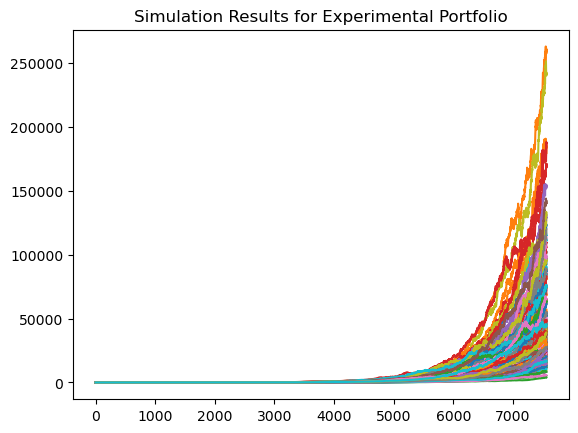

In [47]:
# Plot simulation results

Sim_Plot = MC_even_dist.plot_simulation()
Sim_Plot = Sim_Plot.set_title('Simulation Results for Experimental Portfolio')

Text(0.5, 1.0, 'Cumulative Returns Distribution for Experimental Portfolio')

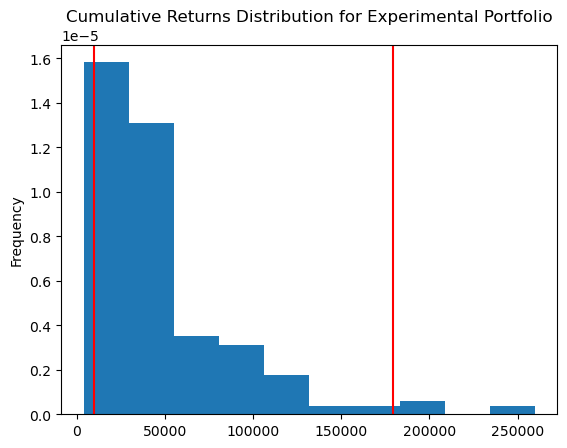

In [50]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()
dist_plot = dist_plot.set_title('Cumulative Returns Distribution for Experimental Portfolio')
dist_plot

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count              200.000000
mean             49179.493446
std              41997.601409
min               3929.859711
25%              23596.464429
50%              34794.957373
75%              58054.361804
max             259782.448496
95% CI Lower      9419.135297
95% CI Upper    179571.384671
Name: 7560, dtype: float64


In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $188382705.94 and $3591427693.41


In [54]:
# Import historical price performance for S&P 500 stocks over the last 7 years
timeframe = '1Day'
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-30', tz='America/New_York').isoformat()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
     alpaca_secret_key,
     api_version="v2"
 )



In [55]:
# Create a dataframe for SPY historical data
df_spy_hist = alpaca.get_bars(
     ['SPY', 'MSFT'],
     timeframe,
     start = start_date,
     end = end_date
 ).df




SPY = df_spy_hist[df_spy_hist['symbol'] == 'SPY'].drop('symbol', axis = 1) 
MSFT = df_spy_hist[df_spy_hist['symbol'] == 'MSFT'].drop('symbol', axis = 1)

df_spy_hist = pd.concat([SPY, MSFT]
                           , axis = 1, keys = ('SPY','MSFT'))
              # MC Simulation requires more than one ticker value so to work around that,
              # a second ticker was added and its weight was set to 0

In [56]:
df_spy_hist

SPY                                       \
                              open    high       low   close     volume   
timestamp                                                                 
2016-06-01 04:00:00+00:00  209.120  210.48  208.8900  210.27   69936215   
2016-06-02 04:00:00+00:00  209.800  210.93  209.2399  210.91   63004749   
2016-06-03 04:00:00+00:00  210.250  210.69  208.8600  210.28  101757126   
2016-06-06 04:00:00+00:00  210.700  211.77  210.5100  211.35   64887045   
2016-06-07 04:00:00+00:00  211.525  212.34  211.5000  211.68   60974761   
...                            ...     ...       ...     ...        ...   
2023-04-24 04:00:00+00:00  411.990  413.07  410.6000  412.63   64341184   
2023-04-25 04:00:00+00:00  410.580  411.16  406.0200  406.08   97784465   
2023-04-26 04:00:00+00:00  406.720  407.84  403.7800  404.36   80954650   
2023-04-27 04:00:00+00:00  407.000  412.69  406.7400  412.41   92968169   
2023-04-28 04:00:00+00:00  411.490  415.93  411.4300  415.93   84857179   

                                                     MSFT                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2016-06-01 04:00:00+00:00      285409  209.840790   52.44   52.95   52.440   
2016-06-02 04:00:00+00:00      253453  210.227199   52.64   52.74   51.835   
2016-06-03 04:00:00+00:00      373400  210.042601   52.38   52.42   51.600   
2016-06-06 04:00:00+00:00      264557  211.208867   51.99   52.35   51.890   
2016-06-07 04:00:00+00:00      229773  211.856123   52.24   52.73   52.100   
...                               ...         ...     ...     ...      ...   
2023-04-24 04:00:00+00:00      463571  412.080965  282.09  284.95  278.720   
2023-04-25 04:00:00+00:00      612111  408.273271  279.51  281.60  275.370   
2023-04-26 04:00:00+00:00      572128  405.591919  296.70  299.57  292.730   
2023-04-27 04:00:00+00:00      614868  410.101891  295.97  305.20  295.250   
2023-04-28 04:00:00+00:00      592226  414.377425  304.01  308.93  303.310   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2016-06-01 04:00:00+00:00   52.85  25324828      137318   52.775452  
2016-06-02 04:00:00+00:00   52.48  22840779      129304   52.306775  
2016-06-03 04:00:00+00:00   51.79  23368291      133519   51.847576  
2016-06-06 04:00:00+00:00   52.13  18243271      102895   52.172779  
2016-06-07 04:00:00+00:00   52.10  20866770      105884   52.358786  
...                           ...       ...         ...         ...  
2023-04-24 04:00:00+00:00  281.77  26640768      420959  281.726259  
2023-04-25 04:00:00+00:00  275.42  47004633      627981  280.958848  
2023-04-26 04:00:00+00:00  295.37  64681706      869828  296.027735  
2023-04-27 04:00:00+00:00  304.83  46463058      650724  302.549963  
2023-04-28 04:00:00+00:00  307.32  31737282      485116  306.123532  

[1740 rows x 14 columns]

In [57]:
# Run a Monte Carlo Simulation for SPY portfolio

MC_spy = MCSimulation(
    portfolio_data = df_spy_hist,
    weights = [1, 0],
    num_simulation = 200,
    num_trading_days = 252*30
)

MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011942,0.995457,0.976890,0.991909,1.016029,0.983900,1.014591,1.002124,1.013810,0.985585,...,1.008175,0.999318,1.004885,1.003751,1.002501,0.985764,0.987444,0.993729,0.998999,0.982838
2,1.010609,0.983565,0.974899,0.978589,1.015841,0.986377,1.013052,0.994047,1.018669,0.981216,...,1.010358,0.981804,0.997806,1.012174,0.999596,0.967908,0.992384,0.989744,1.000988,0.997381
3,1.021228,1.000266,0.971415,0.982895,1.018038,0.996666,1.022675,0.991088,1.009348,0.987415,...,1.011482,0.988454,0.971391,1.018373,0.995885,0.970296,0.989852,0.986569,0.999666,0.999324
4,1.001623,0.993597,0.952867,0.974061,1.008140,0.985519,1.022768,0.978562,1.006034,0.983071,...,0.997371,0.989629,0.954259,1.031938,1.001560,0.975290,0.991144,0.986729,1.012613,0.987847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.219076,10.663333,26.853223,17.972176,15.003299,33.388269,24.558175,14.085939,8.926994,14.099215,...,13.185831,39.078563,33.676848,31.498620,69.598023,47.953991,72.227008,54.263270,6.619657,27.978184
7557,5.115676,10.900313,26.326816,17.862317,14.947939,33.813688,24.921338,14.288881,8.893967,14.168512,...,13.307378,39.235108,33.667870,31.586128,70.399505,47.377215,72.495563,54.450336,6.692354,27.915642
7558,5.147599,10.783293,26.199709,17.962385,14.976130,33.153744,24.852243,14.192384,8.894067,14.253561,...,13.256487,38.797761,33.356709,31.758854,70.570361,47.469223,72.267628,55.711379,6.590169,28.036767
7559,5.209504,10.512991,26.229107,17.733781,15.204378,33.105404,24.974827,14.246281,8.872028,14.276571,...,13.101165,38.457306,32.735535,31.308714,69.980186,47.116213,71.703825,55.726556,6.658604,27.604745


Text(0.5, 1.0, 'Simulation Results for SPY Portfolio')

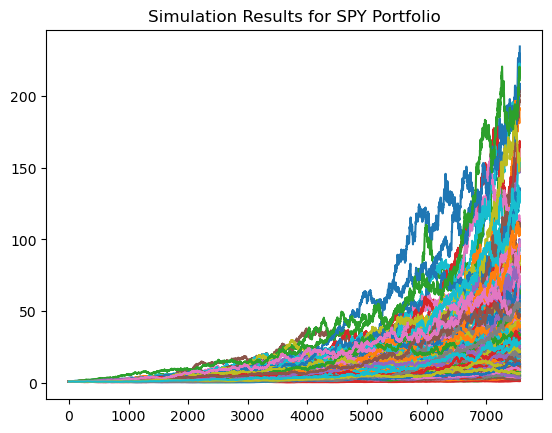

In [62]:
spy_sim_plot = MC_spy.plot_simulation()
spy_sim_plot = spy_sim_plot.set_title('Simulation Results for SPY Portfolio')
spy_sim_plot

Text(0.5, 1.0, 'Cumulative Returns Distribution for SPY Portfolio')

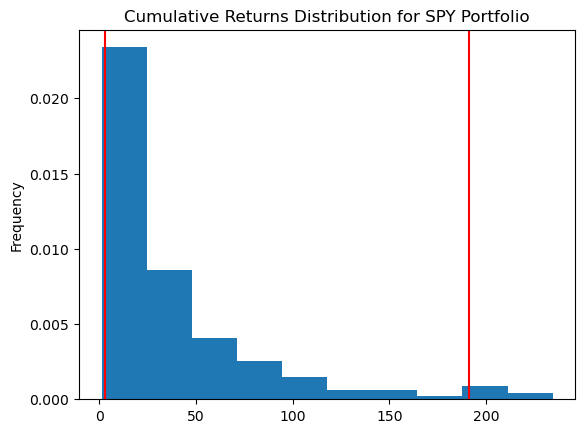

In [67]:
spy_dist_plot = MC_spy.plot_distribution()
spy_dist_plot = spy_dist_plot.set_title('Cumulative Returns Distribution for SPY Portfolio')
spy_dist_plot

In [65]:
tbl_spy = MC_spy.summarize_cumulative_return()
print(tbl_spy)

count           200.000000
mean             38.857158
std              44.775401
min               1.289814
25%              10.908268
50%              21.597240
75%              50.181162
max             234.334903
95% CI Lower      2.777624
95% CI Upper    190.865913
Name: 7560, dtype: float64


In [66]:
# Set initial investment
initial_investment_spy = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower_spy = round(tbl_spy[8]*20000,2)
ci_upper_spy = round(tbl_spy[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_spy} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_spy} and ${ci_upper_spy}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55552.48 and $3817318.27
